<a href="https://colab.research.google.com/github/ashishkumarsaklani/Jam-project/blob/main/Jamboree_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [44]:
url ='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'

df = pd.read_csv(url)

#checking data
df.head().style.set_properties(**{'background':'black','border': '1.5px solid blue','color': 'red'})

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,2,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,3,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,4,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,5,314,103,2,2.000000,3.000000,8.210000,0,0.650000


In [45]:
#setting X and y

X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']



In [46]:
#spliting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:

# Initialize the model
model = LinearRegression()
model_scaled = LinearRegression()


# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [49]:
# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')



Mean Squared Error: 0.003551180545098713
R-squared Value: 0.8263481396039749


In [50]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


             Feature  Coefficient
0         Serial No.     0.000089
1          GRE Score     0.002481
2        TOEFL Score     0.003435
3  University Rating     0.002633
4                SOP     0.004231
5               LOR      0.014953
6               CGPA     0.109066
7           Research     0.022290


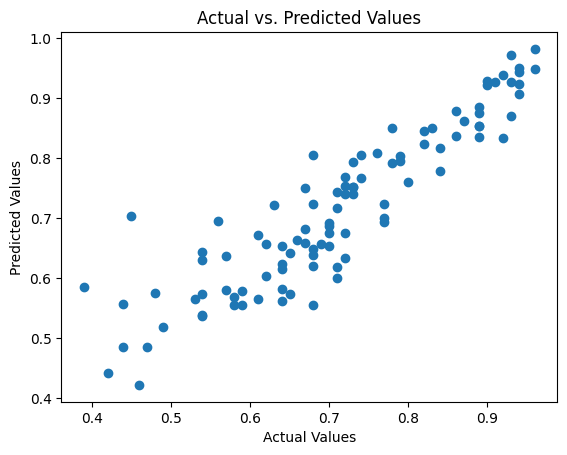

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


In [70]:

# Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')
print(f'Mean Squared scaled Error: {mse_scaled}')
print(f'R-squared scaled Value: {r2_scaled}')
print(y_test[:10],y_pred[:10])


Mean Squared Error: 0.0035511805450987115
R-squared Value: 0.826348139603975
Mean Squared scaled Error: 0.0035511805450987115
R-squared scaled Value: 0.826348139603975
361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
394    0.89
377    0.47
124    0.57
68     0.68
450    0.82
Name: Chance of Admit , dtype: float64 [0.92671922 0.77892806 0.58584082 0.70033329 0.80448871 0.87586753
 0.48485782 0.63648523 0.80460912 0.82275197]


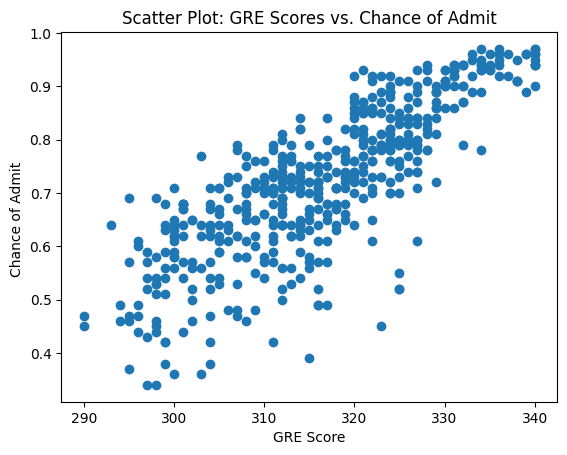

In [55]:
# Scatter plot for GRE Scores vs. Chance of Admit
plt.scatter(df['GRE Score'], df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: GRE Scores vs. Chance of Admit')
plt.show()

# Repeat for other predictor variables


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Checking for Multicollinearity
#correlation_matrix = df.drop('Chance of Admit ', axis=1).corr()
#print(correlation_matrix)

# Calculating VIF
#X_with_intercept = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


            Variable          VIF
0         Serial No.     4.159745
1          GRE Score  1328.233222
2        TOEFL Score  1230.783122
3  University Rating    20.934147
4                SOP    36.155544
5               LOR     31.231834
6               CGPA   952.907558
7           Research     2.869689


In [67]:
X.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'],
      dtype='object')